In [138]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier

In [139]:
df=pd.read_excel(r'C:\Users\hp\Desktop\M2\PFE\data\Well control data set\KICK While DrillingCoring\Well-17\Excel Data\Well-17_07-09-2021.xlsx')
df.shape


(17244, 35)

In [140]:
len(df[df['STATUS']==1].index)

299

In [141]:
X=df[['index','TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)','STATUS']][:12885]

In [55]:
X.shape

(12885, 6)

In [143]:
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

In [57]:
train=X.iloc[:-100]
test=X.iloc[-100:]


In [82]:
pridectors=['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))',
       'GASA (mol/mol)']

In [83]:
model.fit(train[pridectors],train['STATUS'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [84]:
preds=model.predict(test[pridectors])

In [61]:
preds=pd.Series(preds,index=test.index)
print(preds.value_counts())
print(confusion_matrix(test['STATUS'],preds))
print(accuracy_score(test['STATUS'],preds))
print(f1_score(test['STATUS'],preds))
print(precision_score(test['STATUS'],preds))
print(recall_score(test['STATUS'],preds))

1    100
dtype: int64
[[100]]
1.0
1.0
1.0
1.0


<Axes: >

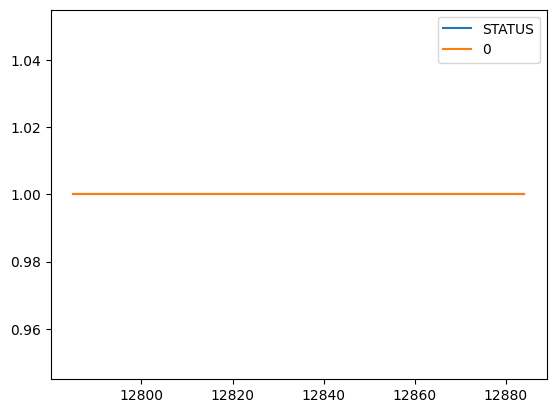

In [62]:
combined=pd.concat([test['STATUS'],preds],axis=1)
combined.plot()

In [126]:
test_1=df[['index','TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)','STATUS']][12875:]
test_1.shape

(4369, 6)

In [127]:
preds_t1=model.predict(test_1[pridectors])

In [128]:
preds_t1=pd.Series(preds_t1,index=test_1.index)
print(preds_t1.value_counts())
print(confusion_matrix(test_1['STATUS'],preds_t1))
print(accuracy_score(test_1['STATUS'],preds_t1))
print(f1_score(test_1['STATUS'],preds_t1))
print(precision_score(test_1['STATUS'],preds_t1))
print(recall_score(test_1['STATUS'],preds_t1))

0    4369
dtype: int64
[[4358    0]
 [  11    0]]
0.9974822613870451
0.0
0.0
0.0


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
combined_t1=pd.concat([test_1['STATUS'],preds_t1],axis=1)
combined_t1.plot()

In [144]:
def predict(train,test,pridectors,model):
    # print(pridectors)
    model.fit(train[pridectors] ,train['STATUS'])
    preds=model.predict(test[pridectors])
    preds=pd.Series(preds,index=test.index,name='Predictions')
    combined=pd.concat([test['STATUS'],preds],axis=1)
    return combined
    

In [ ]:
dd

In [193]:
from sklearn.model_selection import validation_curve

In [190]:
def backtest(data,model,pridectors,start=2516,step=36):
    all_prediction=[]
    for i in range(start,data.shape[0],step):
        train=data.iloc[:i,:]
        print('-----------------train------------------')  
        print(train.index)
        test=data.iloc[i:(i+step)].copy()
        print('-----------------test------------------')
        print(test.index)
        param_range = np.arange(1, 250, 20)
        train_scores, test_scores = validation_curve(
                RandomForestClassifier(), train, test, param_name="n_estimators", param_range=param_range,
             scoring="accuracy", n_jobs=1)

        predictions=predict(train,test,pridectors,model)
        all_prediction.append(predictions)
    return pd.concat(all_prediction)
    

In [180]:
modelRFC=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

In [185]:
data_f=df[['index','TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)','STATUS']][:12885]


In [184]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame named 'df' with the data to be normalized

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']  # Adjust the column names as per your requirement

# Perform the min-max normalization
data_f[columns_to_normalize] = scaler.fit_transform(data_f[columns_to_normalize])




In [186]:
pridectors=['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))',
       'GASA (mol/mol)']

In [ ]:
predcions=backtest(data_f,modelRFC,pridectors)

In [194]:
predcions=backtest(data_f,modelRFC,pridectors)
print(predcions.value_counts())
print(confusion_matrix(predcions['STATUS'],predcions['Predictions']))

print(accuracy_score(predcions['STATUS'],predcions['Predictions']))
print(f1_score(predcions['STATUS'],predcions['Predictions']))
print(precision_score(predcions['STATUS'],predcions['Predictions']))
print(recall_score(predcions['STATUS'],predcions['Predictions']))

-----------------train------------------
RangeIndex(start=0, stop=2516, step=1)
-----------------test------------------
RangeIndex(start=2516, stop=2552, step=1)
-----------------train------------------
RangeIndex(start=0, stop=2552, step=1)
-----------------test------------------
RangeIndex(start=2552, stop=2588, step=1)
-----------------train------------------
RangeIndex(start=0, stop=2588, step=1)
-----------------test------------------
RangeIndex(start=2588, stop=2624, step=1)
-----------------train------------------
RangeIndex(start=0, stop=2624, step=1)
-----------------test------------------
RangeIndex(start=2624, stop=2660, step=1)
-----------------train------------------
RangeIndex(start=0, stop=2660, step=1)
-----------------test------------------
RangeIndex(start=2660, stop=2696, step=1)
-----------------train------------------
RangeIndex(start=0, stop=2696, step=1)
-----------------test------------------
RangeIndex(start=2696, stop=2732, step=1)
-----------------train------

In [124]:
from keras.models import Sequential
from keras.layers import LSTM, BatchNormalization, Dense

# Assuming you have your input data and target labels ready

# Define the number of time steps in your input sequence
time_steps = 45

# Define the number of features in your input data
num_features = 8

# Initialize the LSTM model
Lstm_model = Sequential()

# Add the first LSTM layer with batch normalization
Lstm_model.add(LSTM(units=8, input_shape=(36, 4), return_sequences=True))
Lstm_model.add(BatchNormalization())

# Add the second LSTM layer with batch normalization
Lstm_model.add(LSTM(units=8, return_sequences=True))
Lstm_model.add(BatchNormalization())

# Add the third LSTM layer with batch normalization
Lstm_model.add(LSTM(units=8))
Lstm_model.add(BatchNormalization())

# Add the dense (fully connected) layer for classification
Lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with metrics
Lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall', 'f1_score'])

# Print the summary of the model
print(Lstm_model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 36, 8)             416       
                                                                 
 batch_normalization_6 (Batc  (None, 36, 8)            32        
 hNormalization)                                                 
                                                                 
 lstm_7 (LSTM)               (None, 36, 8)             544       
                                                                 
 batch_normalization_7 (Batc  (None, 36, 8)            32        
 hNormalization)                                                 
                                                                 
 lstm_8 (LSTM)               (None, 8)                 544       
                                                                 
 batch_normalization_8 (Batc  (None, 8)               

In [125]:
predcions_Lstm=backtest(data_f,Lstm_model,pridectors)


ValueError: in user code:

    File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 36, 4), found shape=(None, 4)


In [ ]:
print(predcions_Lstm.value_counts())
print(confusion_matrix(predcions_Lstm['STATUS'],predcions_Lstm['Predictions']))

print(accuracy_score(predcions_Lstm['STATUS'],predcions_Lstm['Predictions']))
print(f1_score(predcions_Lstm['STATUS'],predcions_Lstm['Predictions']))
print(precision_score(predcions_Lstm['STATUS'],predcions_Lstm['Predictions']))
print(recall_score(predcions_Lstm['STATUS'],predcions_Lstm['Predictions']))